In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('mobile_price.csv')

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.shape

(2000, 21)

In [ ]:
df.columns


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### ***Hence we dont have to handle the NULL values***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


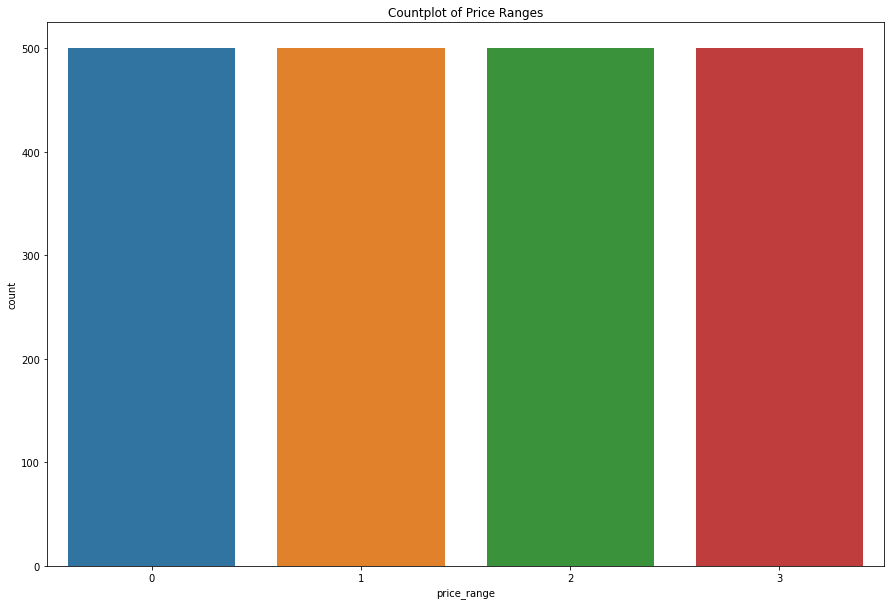

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(df['price_range'])
plt.title('Countplot of Price Ranges')
plt.show()

## **Spliting data into test and train**

In [ ]:
x = df.iloc[:,0:20]
y = df.iloc[:,-1]
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [ ]:
x.shape

(2000, 20)

In [ ]:
y.shape

(2000,)

In [ ]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [ ]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1400, 20)
(1400,)
(600, 20)
(600,)


In [ ]:
x_test.shape

(600, 20)

In [ ]:
y_test.shape

(600,)

## **KNN Classification**

In [ ]:
x = df.iloc[:,:20]
y = df.iloc[:,-1]
x.shape[0] == y.shape[0]

True

In [ ]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state = 1)


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scale = MinMaxScaler()
# #scale is done only gotninput data
# x_train = scale.fit_transform(x_train)
# x_test = scale.transform(x_test)

In [ ]:
Knn = KNeighborsClassifier(n_neighbors=7, metric="euclidean")

In [ ]:
Knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [ ]:
y_pred = Knn.predict(x)

In [ ]:
y_pred

array([1, 2, 2, ..., 3, 0, 3])

In [ ]:
y_test

674     0
1699    0
1282    1
1315    1
1210    2
       ..
1382    0
1371    2
854     2
995     3
1497    3
Name: price_range, Length: 600, dtype: int64

In [ ]:
y_test.shape[0] == y_pred.shape[0]

False

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc= accuracy_score(y_test,y_pred)
acc

ValueError: ignored

In [ ]:
Knn.score(x_test,y_test)


0.92

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.values,y_pred)
cm

ValueError: ignored

In [ ]:
#import classification_report
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_pred,y_test))

ValueError: ignored

### ***KNN Has Accuracy of 92%***

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Fit the model 

model.fit(x_train,y_train)

y_pred = model.predict(x_test)
y_pred   #predicted output 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([0, 0, 2, 0, 2, 1, 1, 3, 2, 3, 0, 3, 1, 1, 3, 0, 1, 3, 1, 2, 3, 3,
       1, 2, 3, 1, 3, 3, 3, 1, 2, 0, 3, 0, 3, 3, 1, 0, 1, 0, 2, 0, 1, 1,
       0, 0, 3, 2, 3, 3, 1, 3, 1, 3, 1, 3, 2, 2, 3, 1, 0, 1, 1, 2, 2, 2,
       1, 2, 2, 3, 2, 3, 0, 3, 3, 0, 1, 1, 0, 0, 0, 3, 1, 3, 3, 3, 3, 0,
       1, 0, 3, 0, 1, 2, 1, 3, 3, 0, 3, 2, 3, 3, 1, 1, 3, 0, 1, 1, 0, 2,
       1, 3, 1, 1, 2, 2, 3, 1, 2, 1, 2, 0, 0, 0, 3, 0, 1, 0, 1, 1, 0, 2,
       0, 3, 2, 0, 3, 3, 1, 0, 0, 0, 2, 1, 0, 3, 0, 1, 0, 1, 3, 3, 1, 1,
       0, 1, 1, 1, 2, 2, 2, 1, 3, 2, 3, 2, 2, 1, 3, 3, 2, 0, 3, 1, 0, 3,
       3, 0, 1, 3, 1, 3, 0, 0, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 3,
       3, 2, 2, 2, 0, 1, 2, 1, 2, 2, 1, 1, 0, 3, 1, 0, 3, 0, 1, 0, 3, 1,
       0, 1, 3, 1, 3, 3, 0, 3, 1, 1, 2, 2, 3, 3, 2, 1, 1, 1, 3, 1, 3, 3,
       3, 3, 0, 0, 2, 0, 3, 3, 2, 0, 1, 2, 1, 3, 1, 3, 2, 0, 3, 1, 1, 2,
       1, 1, 3, 0, 3, 1, 1, 1, 0, 2, 2, 2, 1, 1, 0, 3, 2, 3, 1, 3, 2, 0,
       0, 3, 0, 0, 1, 2, 1, 3, 0, 1, 1, 2, 3, 2, 1,

In [ ]:
y_test

674     0
1699    0
1282    1
1315    1
1210    2
       ..
1382    0
1371    2
854     2
995     3
1497    3
Name: price_range, Length: 600, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_pred,y_test)

0.6283333333333333

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)
#TRUE POSITIVE   - value was supposed to be 1, model has predicted correctly as 1      (67) 
#FALSE POSITIVE  - value was supposed to be 0, model has predicted wrongly as 1        (10)
#FALSE NEGATIVE  - value was supposed to be 1, model has predicted wrongly as 0        (1)
#TRUE NEGATIVE   - value was supposed to be 0, model has predicted correctly as 0      (22) 

array([[108,  30,   0,   0],
       [ 26,  86,  49,   1],
       [  1,  28,  67,  31],
       [  0,   5,  52, 116]])

In [ ]:
#import classification_report
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       135
           1       0.53      0.58      0.55       149
           2       0.53      0.40      0.45       168
           3       0.67      0.78      0.72       148

    accuracy                           0.63       600
   macro avg       0.63      0.64      0.63       600
weighted avg       0.62      0.63      0.62       600



### ***Hence Logistic Regression has Accuracy of 63%***

## **SVM Classifier**

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC()
model.fit(x_train,y_train)

SVC()

In [ ]:
y_pred

array([0, 0, 2, 0, 2, 1, 1, 3, 2, 3, 0, 3, 1, 1, 3, 0, 1, 3, 1, 2, 3, 3,
       1, 2, 3, 1, 3, 3, 3, 1, 2, 0, 3, 0, 3, 3, 1, 0, 1, 0, 2, 0, 1, 1,
       0, 0, 3, 2, 3, 3, 1, 3, 1, 3, 1, 3, 2, 2, 3, 1, 0, 1, 1, 2, 2, 2,
       1, 2, 2, 3, 2, 3, 0, 3, 3, 0, 1, 1, 0, 0, 0, 3, 1, 3, 3, 3, 3, 0,
       1, 0, 3, 0, 1, 2, 1, 3, 3, 0, 3, 2, 3, 3, 1, 1, 3, 0, 1, 1, 0, 2,
       1, 3, 1, 1, 2, 2, 3, 1, 2, 1, 2, 0, 0, 0, 3, 0, 1, 0, 1, 1, 0, 2,
       0, 3, 2, 0, 3, 3, 1, 0, 0, 0, 2, 1, 0, 3, 0, 1, 0, 1, 3, 3, 1, 1,
       0, 1, 1, 1, 2, 2, 2, 1, 3, 2, 3, 2, 2, 1, 3, 3, 2, 0, 3, 1, 0, 3,
       3, 0, 1, 3, 1, 3, 0, 0, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 3,
       3, 2, 2, 2, 0, 1, 2, 1, 2, 2, 1, 1, 0, 3, 1, 0, 3, 0, 1, 0, 3, 1,
       0, 1, 3, 1, 3, 3, 0, 3, 1, 1, 2, 2, 3, 3, 2, 1, 1, 1, 3, 1, 3, 3,
       3, 3, 0, 0, 2, 0, 3, 3, 2, 0, 1, 2, 1, 3, 1, 3, 2, 0, 3, 1, 1, 2,
       1, 1, 3, 0, 3, 1, 1, 1, 0, 2, 2, 2, 1, 1, 0, 3, 2, 3, 1, 3, 2, 0,
       0, 3, 0, 0, 1, 2, 1, 3, 0, 1, 1, 2, 3, 2, 1,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_pred,y_test)

0.6283333333333333

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[108,  30,   0,   0],
       [ 26,  86,  49,   1],
       [  1,  28,  67,  31],
       [  0,   5,  52, 116]])

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       138
           1       0.58      0.53      0.55       162
           2       0.40      0.53      0.45       127
           3       0.78      0.67      0.72       173

    accuracy                           0.63       600
   macro avg       0.64      0.63      0.63       600
weighted avg       0.65      0.63      0.64       600



### ***Hence SVM has Accuracy of 63%***

## **Comparing all accuracies, we can conclude that KNN has the highest Accuracy of 92%**